In [50]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

In [8]:
df=pd.read_csv("Phase1.csv")

In [9]:
df

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,0,tcp,ftp_data,SF,491,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,1,0,udp,other,SF,146,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,3,0,tcp,http,SF,232,8153,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
3,4,0,tcp,http,SF,199,420,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,12,0,tcp,http,SF,287,2251,0,0,0,...,219,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13594,310,0,tcp,uucp,S0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
13595,312,0,tcp,exec,RSTO,0,0,0,0,0,...,9,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
13596,313,0,tcp,netbios_dgm,S0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
13597,315,0,icmp,ecr_i,SF,1032,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,anomaly


#1.1

In [18]:
#voire les valeurs manquants 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13599 entries, 0 to 13598
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   13599 non-null  int64  
 1   duration                     13599 non-null  int64  
 2   protocol_type                13599 non-null  object 
 3   service                      13599 non-null  object 
 4   flag                         13599 non-null  object 
 5   src_bytes                    13599 non-null  int64  
 6   dst_bytes                    13599 non-null  int64  
 7   land                         13599 non-null  int64  
 8   wrong_fragment               13599 non-null  int64  
 9   urgent                       13599 non-null  int64  
 10  hot                          13599 non-null  int64  
 11  num_failed_logins            13599 non-null  int64  
 12  logged_in                    13599 non-null  int64  
 13  num_compromised 

il n ya pas des valuers manquants

In [19]:
df.isnull().sum().sort_values(ascending=False)

Unnamed: 0                     0
dst_host_count                 0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_srv_count             0
is_guest_login                 0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
dst_host_serror_rate           0
dst_host_srv_serror_rate       0
dst_host_rerror_rate           0
dst_host_srv_rerror_rate       0
count                          0
is_host_login                  0
duration                       0
hot                            0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_frag

il n ya pas toujours les valeurs manquantes

In [21]:
df.describe(include="O")

,protocol_type,service,flag,class
count,13599,13599,13599,13599
unique,3,51,10,2
top,tcp,http,SF,normal
freq,10807,7566,12693,13449


In [10]:
 #renseigner les valeurs manquantes
char_data = []
num_data =[]
for i,c in enumerate(df.dtypes): 
    if c==object:
        char_data.append(df.iloc[:,i])
    else:
        num_data.append(df.iloc[:,i])
char_data=pd.DataFrame(char_data).transpose()
char_data


,protocol_type,service,flag,class
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,http,SF,normal
3,tcp,http,SF,normal
4,tcp,http,SF,normal
...,...,...,...,...
13594,tcp,uucp,S0,anomaly
13595,tcp,exec,RSTO,anomaly
13596,tcp,netbios_dgm,S0,anomaly
13597,icmp,ecr_i,SF,anomaly


In [11]:
num_data=pd.DataFrame(num_data).transpose()
num_data

,Unnamed: 0,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.0,491.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,150.0,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,1.0,0.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,3.0,0.0,232.0,8153.0,0.0,0.0,0.0,0.0,0.0,1.0,...,30.0,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
3,4.0,0.0,199.0,420.0,0.0,0.0,0.0,0.0,0.0,1.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,12.0,0.0,287.0,2251.0,0.0,0.0,0.0,0.0,0.0,1.0,...,8.0,219.0,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13594,310.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,13.0,0.05,0.07,0.00,0.00,1.00,1.00,0.00,0.00
13595,312.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,9.0,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00
13596,313.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,19.0,0.07,0.07,0.00,0.00,1.00,1.00,0.00,0.00
13597,315.0,0.0,1032.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00


In [28]:
char_data.isnull().sum().any()

False

In [29]:
num_data.isnull().sum().any()

False

In [12]:
target_value={'normal':1,"anomaly":0}
target=char_data['class']
char_data.drop('class',axis=1,inplace=True)
target=target.map(target_value)
target

0        1
1        1
2        1
3        1
4        1
        ..
13594    0
13595    0
13596    0
13597    0
13598    0
Name: class, Length: 13599, dtype: int64

In [13]:
#remplacer les valeurs categoriques
le=LabelEncoder()
for i in char_data:
    char_data[i]=le.fit_transform(char_data[i])
char_data

,protocol_type,service,flag
0,1,15,8
1,2,32,8
2,1,18,8
3,1,18,8
4,1,18,8
...,...,...,...
13594,1,47,4
13595,1,12,2
13596,1,29,4
13597,0,10,8


In [14]:
num_data.drop('Unnamed: 0',axis=1,inplace=True)


In [68]:
pd.set_option('display.max_rows',10)

In [69]:
num_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,491.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,150.0,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0.0,232.0,8153.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,30.0,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
3,0.0,199.0,420.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.0,287.0,2251.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,8.0,219.0,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,13.0,0.05,0.07,0.00,0.00,1.00,1.00,0.00,0.00
13595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,9.0,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00
13596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,19.0,0.07,0.07,0.00,0.00,1.00,1.00,0.00,0.00
13597,0.0,1032.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00


In [113]:
char_data

,protocol_type,service,flag
0,1,15,8
1,2,32,8
2,1,18,8
3,1,18,8
4,1,18,8
...,...,...,...
13594,1,47,4
13595,1,12,2
13596,1,29,4
13597,0,10,8


In [15]:
#concatiner
X=pd.concat([char_data,num_data],axis=1)
y=target

In [115]:
X

,protocol_type,service,flag,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1,15,8,0.0,491.0,0.0,0.0,0.0,0.0,0.0,...,150.0,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,2,32,8,0.0,146.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,1,18,8,0.0,232.0,8153.0,0.0,0.0,0.0,0.0,...,30.0,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
3,1,18,8,0.0,199.0,420.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1,18,8,0.0,287.0,2251.0,0.0,0.0,0.0,0.0,...,8.0,219.0,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13594,1,47,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,13.0,0.05,0.07,0.00,0.00,1.00,1.00,0.00,0.00
13595,1,12,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,9.0,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00
13596,1,29,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,19.0,0.07,0.07,0.00,0.00,1.00,1.00,0.00,0.00
13597,0,10,8,0.0,1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00


In [116]:
y

0        1
1        1
2        1
3        1
4        1
        ..
13594    0
13595    0
13596    0
13597    0
13598    0
Name: class, Length: 13599, dtype: int64

In [16]:
target.value_counts()

1    13449
0      150
Name: class, dtype: int64

In [17]:
df=pd.concat([char_data,num_data,target],axis=1)
df

,protocol_type,service,flag,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,1,15,8,0.0,491.0,0.0,0.0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,2,32,8,0.0,146.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,1,18,8,0.0,232.0,8153.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
3,1,18,8,0.0,199.0,420.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
4,1,18,8,0.0,287.0,2251.0,0.0,0.0,0.0,0.0,...,219.0,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13594,1,47,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,0.05,0.07,0.00,0.00,1.00,1.00,0.00,0.00,0
13595,1,12,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,0
13596,1,29,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,0.07,0.07,0.00,0.00,1.00,1.00,0.00,0.00,0
13597,0,10,8,0.0,1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0


C:\Users\karim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


le pourcentage pour normal est : 0.9889697771894992
le pourcentage pour les anomaly est : 0.011030222810500772


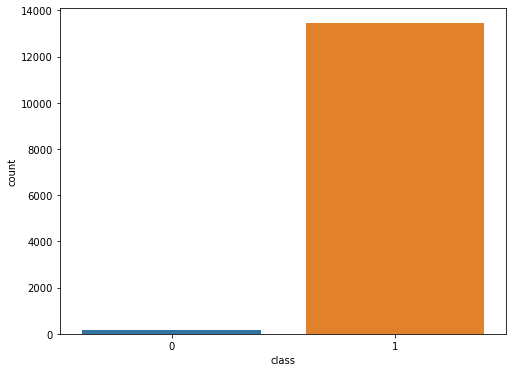

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(df['class'])
normal=target.value_counts()[1]/len(target)
anomaly=target.value_counts()[0]/len(target)
print(f'le pourcentage pour normal est : {normal}')
print(f'le pourcentage pour les anomaly est : {anomaly}')

C:\Users\karim\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\karim\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


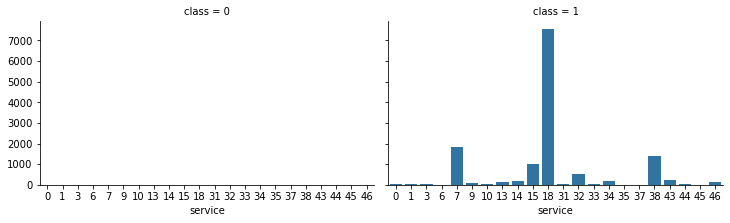

In [19]:
#service
grid=sns.FacetGrid(df,col='class',size=3.2,aspect=1.6)
grid.map(sns.countplot,'service')

C:\Users\karim\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\karim\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


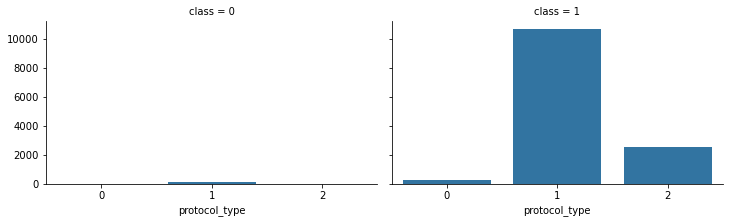

In [20]:
#protocol_type
grid=sns.FacetGrid(df,col='class',size=3.2,aspect=1.6)
grid.map(sns.countplot,'protocol_type')

In [21]:
df.groupby('class').median()

,protocol_type,service,flag,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
class,,,,,,,,,,,,,,,,,,,,,
0,1,30,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,13.0,0.05,0.07,0.00,0.0,1.0,1.0,0.0,0.0
1,1,18,8,0.0,234.0,382.0,0.0,0.0,0.0,0.0,...,158.0,255.0,1.00,0.00,0.01,0.0,0.0,0.0,0.0,0.0


In [22]:
#commancer la creation du model 
#Diviser db (partie test partie entrainement)
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=42)
for train,test in sss.split(X,y):
    X_train,X_test=X.iloc[train],X.iloc[test]
    y_train,y_test=y.iloc[train],y.iloc[test]
print('X_train taille : ',X_train.shape)
print('X_test taille : ',X_test.shape)
print('y_train taille : ',y_train.shape)
print('y_test taille : ',y_test.shape)

X_train taille :  (9519, 41)
X_test taille :  (4080, 41)
y_train taille :  (9519,)
y_test taille :  (4080,)


#1.2

In [23]:
#application des 3 algos logisitic Regression , Knn , DecisionTree

models={
    'LogisticRegression':LogisticRegression(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1,random_state=42)
}
#fonction de precision
def accu(y_true,y_pred,retu=False):
    acc=accuracy_score(y_true,y_pred)
    if retu:
        return acc
    else:
        print(f'la precision du modele est :{acc}')

#fonction d'application du modele:
def train_test_eval(models,X_train,y_train,X_test,y_test):
    for name,model in models.items():
        print(name,':')
        model.fit(X_train,y_train)
        accu(y_test,model.predict(X_test))
        print('-'*30)
train_test_eval(models,X_train,y_train,X_test,y_test)

LogisticRegression :


C:\Users\karim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


la precision du modele est :0.9946078431372549
------------------------------
KNeighborsClassifier :
la precision du modele est :0.9965686274509804
------------------------------
DecisionTreeClassifier :
la precision du modele est :0.995343137254902
------------------------------


le modele avec la meilleur performance est : KNN

#1.3

In [42]:
#fonction de la matrice de confusion 
def matrice_de_confustion(y_true, y_pred):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for true, pred in zip(y_true, y_pred):
        if true == 1 and pred == 1:
            TP += 1
        elif true == 0 and pred == 0:
            TN += 1 
        elif true == 0 and pred == 1:
            FP += 1 
        elif true == 1 and pred == 0:
            FN += 1  
    return TP, TN, FP, FN
    

In [43]:
#cherche les parametres optimaux du modele knn : 
from sklearn.model_selection import  GridSearchCV
grid_params={
    'n_neighbors':[3,5,7,9,11],
    'metric':['euclidean','manhattan']
}
gs=GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    cv=5 
)
gs_results=gs.fit(X_train, y_train)

In [44]:
gs_results.best_params_

{'metric': 'euclidean', 'n_neighbors': 3}

In [45]:
knn= KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test) 

In [46]:
TP, FP, TN, FN = matrice_de_confustion(y_test, y_pred)

In [47]:
TP, FP, TN, FN

(4032, 39, 6, 3)

In [48]:
#on applique la fonction predefinie de la matrice de confusion pour asssure les valeurs
from sklearn.metrics import  confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  39,    6],
       [   3, 4032]], dtype=int64)

#1.4

In [53]:
y_train_pred = cross_val_predict(knn, X_train, y_train, cv=5)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)
print("Precision :", precision)
print("Rappel :", recall)
print("F1 Score :", f1)

Precision : 0.9979832289565863
Rappel : 0.9987253027405991
F1 Score : 0.9983541279532785


#1.5
Il y a un déséquilibre important entre les deux classes de la dataset : la classe 1, qui représente les connexions normales, compte un nombre beaucoup plus élevé d'exemples par rapport à la classe 0, qui correspond aux anomalies ou aux intrusions.